In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras import optimizers
from keras.optimizers import RMSprop, Adagrad, Adadelta
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\pisar\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pisar\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pisar\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pisar\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
pixels = df.columns.drop('label')
y_column = 'label'

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train, validation = train_test_split(df, test_size=0.2)

In [6]:
x_train = train[pixels].values
y_train = train[y_column].values

x_val = validation[pixels].values
y_val = validation[y_column].values

In [7]:
y_train = y_train.reshape((y_train.shape[0], 1))
y_val = y_val.reshape((y_val.shape[0], 1))

In [8]:
print(x_train.shape, y_train.shape)

(33600, 784) (33600, 1)


In [9]:
from sklearn.metrics import accuracy_score

**1 Нейросеть**
состоит из 3 скрытых слоев с дропаутом 0,25 и оптимизатором RMSprop

In [10]:
y_all_pred = np.zeros((3, x_val.shape[0])).astype(np.int64) #matrix results

In [11]:
model1 = Sequential()
model1.add(Dense(units = 64, activation = 'relu', input_dim = len(pixels)))
model1.add(Dense(units = 32, activation = 'relu'))
model1.add(Dropout(0.25))
model1.add(Dense(units = 10, activation = 'softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
optimizer = RMSprop (lr = 0.001) #сколрость обучения

In [13]:
model1.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [14]:
history1 = model1.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 6s 172us/step - loss: 7.3825 - acc: 0.5306 - val_loss: 5.5237 - val_acc: 0.6519
Epoch 2/50
33600/33600 [==============================] - 5s 162us/step - loss: 5.3004 - acc: 0.6619 - val_loss: 3.6996 - val_acc: 0.7631
Epoch 3/50
33600/33600 [==============================] - 5s 155us/step - loss: 4.0541 - acc: 0.7397 - val_loss: 3.0883 - val_acc: 0.8020
Epoch 4/50
33600/33600 [==============================] - 4s 129us/step - loss: 3.6344 - acc: 0.7661 - val_loss: 3.0858 - val_acc: 0.8045
Epoch 5/50
33600/33600 [==============================] - 4s 132us/step - loss: 3.4328 - acc: 0.7800 - val_loss: 3.2307 - val_acc: 0.7960
Epoch 6/50
33600/33600 [==============================] - 4s 122us/step - loss: 3.1148 - acc: 0.7988 - val_loss: 1.9329 - val_acc: 0.8742
Epoch 7/50
33600/33600 [=====

In [15]:
def plotgraph(history):
    fig, ax = plt.subplots(2,1)
    ax[0].plot(history.history['loss'], color = 'b', label = "Training loss")
    ax[0].plot(history.history['val_loss'], color = 'r', label = "Validation loss", axes = ax[0])
    legend = ax[0].legend(loc = 'best', shadow = True)
    ax[1].plot(history.history['acc'], color = 'b', label = "Training accurancy")
    ax[1].plot(history.history['val_acc'], color = 'r', label = "Validation accurancy")
    legend = ax[1].legend(loc = 'best', shadow = True)

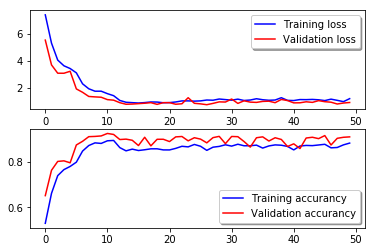

In [16]:
plotgraph(history1)

In [17]:
y_pred_mod1 = model1.predict_classes(x_val)
accuracy_score(y_val, y_pred_mod1)

0.9096428571428572

In [18]:
y_all_pred[0] = y_pred_mod1

**2 Нейросеть** с 4 скрытыми слоями дропаутом 0,25 и оптимизатором Adagrad

In [19]:
model2 = Sequential()
model2.add(Dense(256, activation = 'relu', input_dim = len(pixels)))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.25))
model2.add(Dense(10, activation = 'softmax'))

In [20]:
optimizer2 = Adagrad()

In [21]:
model2.compile(optimizer = optimizer2, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 9s 253us/step - loss: 12.3373 - acc: 0.2333 - val_loss: 10.8237 - val_acc: 0.3264
Epoch 2/50
33600/33600 [==============================] - 9s 255us/step - loss: 9.5259 - acc: 0.4073 - val_loss: 7.8256 - val_acc: 0.5126
Epoch 3/50
33600/33600 [==============================] - 8s 238us/step - loss: 7.3691 - acc: 0.5400 - val_loss: 6.8460 - val_acc: 0.5731
Epoch 4/50
33600/33600 [==============================] - 8s 224us/step - loss: 6.5691 - acc: 0.5903 - val_loss: 6.1601 - val_acc: 0.6168
Epoch 5/50
33600/33600 [==============================] - 7s 221us/step - loss: 6.1030 - acc: 0.6194 - val_loss: 6.0230 - val_acc: 0.6248
Epoch 6/50
33600/33600 [==============================] - 8s 223us/step - loss: 5.9732 - acc: 0.6279 - val_loss: 5.8853 - val_acc: 0.6340
Epoch 7/50
33600/33600 [==============================] - 8s 229us/step - loss: 5.9064 - acc: 0.6318 - val_loss: 5.8470 -

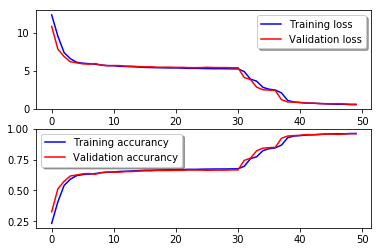

In [22]:
history2 = model2.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 32)
plotgraph(history2)

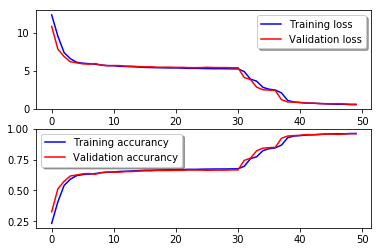

In [24]:
plotgraph(history2)

In [25]:
y_pred_mod2 = model2.predict_classes(x_val)
accuracy_score(y_val, y_pred_mod2)

0.9588095238095238

In [26]:
y_all_pred[1] = y_pred_mod2

Применим к этой модели другой оптимизатор - Adadelta

In [30]:
optimizer3 = Adadelta()
model2.compile(optimizer = optimizer3, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 6s 191us/step - loss: 0.3279 - acc: 0.9672 - val_loss: 0.4772 - val_acc: 0.9550
Epoch 2/30
33600/33600 [==============================] - 6s 171us/step - loss: 0.3278 - acc: 0.9637 - val_loss: 0.4766 - val_acc: 0.9521
Epoch 3/30
33600/33600 [==============================] - 6s 187us/step - loss: 0.3043 - acc: 0.9644 - val_loss: 0.3788 - val_acc: 0.9656
Epoch 4/30
33600/33600 [==============================] - 6s 168us/step - loss: 0.2877 - acc: 0.9707 - val_loss: 0.4642 - val_acc: 0.9637
Epoch 5/30
33600/33600 [==============================] - 5s 148us/step - loss: 0.2910 - acc: 0.9699 - val_loss: 0.3439 - val_acc: 0.9642
Epoch 6/30
33600/33600 [==============================] - 5s 148us/step - loss: 0.2842 - acc: 0.9655 - val_loss: 0.3766 - val_acc: 0.9617
Epoch 7/30
33600/33600 [==============================] - 5s 148us/step - loss: 0.3015 - acc: 0.9650 - val_loss: 0.4072 - v

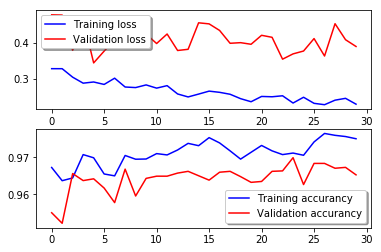

In [31]:
history3 = model2.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 30, batch_size = 64)
plotgraph(history3)

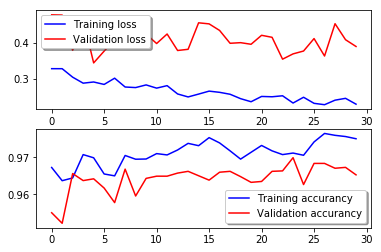

In [32]:
plotgraph(history3)

In [33]:
y_pred_mod3 = model2.predict_classes(x_val)
accuracy_score(y_val, y_pred_mod3)

0.9652380952380952

In [34]:
y_all_pred[2] = y_pred_mod3

Как видим две простые полносвязные нейросети показали довольно посредственные результаты, лучший из которых 0.95 

**3 Нейросеть** -сверточная, должна показать лучший результат

In [35]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Reshape, Conv2D, AveragePooling2D, Flatten
from keras.layers import MaxPooling2D
from keras.optimizers import adam

y_train_cnn = keras.utils.to_categorical(y_train, num_classes=10) #преобразует метки классов в бинарную матрицу

In [37]:
model_cnn = Sequential()
model_cnn.add(Reshape(target_shape=(1, 28, 28), input_shape=(784,)))
model_cnn.add(Conv2D(kernel_size=(3, 3), filters=6, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model_cnn.add(Conv2D(kernel_size=(5, 5), filters=16, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model_cnn.add(Conv2D(kernel_size=(5, 5), filters=120, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model_cnn.add(Flatten())
model_cnn.add(Dense(output_dim=120, activation='relu'))
model_cnn.add(Dropout(0.25))
model_cnn.add(Dense(output_dim=120, activation='relu'))
model_cnn.add(Dense(output_dim=10, activation='softmax'))

C:\Users\pisar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=120)`
  if __name__ == '__main__':
C:\Users\pisar\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=120)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\pisar\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if sys.path[0] == '':


In [38]:
adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_cnn.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [39]:
model_cnn.fit(x_train, y_train_cnn, epochs=30, batch_size=64)

Epoch 1/30
33600/33600 [==============================] - 33s 970us/step - loss: 0.2642 - acc: 0.9179
Epoch 2/30
33600/33600 [==============================] - 29s 878us/step - loss: 0.1093 - acc: 0.9668
Epoch 3/30
33600/33600 [==============================] - 29s 873us/step - loss: 0.0837 - acc: 0.9736
Epoch 4/30
33600/33600 [==============================] - 32s 953us/step - loss: 0.0726 - acc: 0.9774
Epoch 5/30
33600/33600 [==============================] - 28s 820us/step - loss: 0.0657 - acc: 0.9796
Epoch 6/30
33600/33600 [==============================] - 29s 876us/step - loss: 0.0599 - acc: 0.9816
Epoch 7/30
33600/33600 [==============================] - 32s 955us/step - loss: 0.0600 - acc: 0.9821
Epoch 8/30
33600/33600 [==============================] - 29s 874us/step - loss: 0.0519 - acc: 0.9845
Epoch 9/30
33600/33600 [==============================] - 29s 868us/step - loss: 0.0599 - acc: 0.9827
Epoch 10/30
33600/33600 [==============================] - 30s 897us/step - loss: 

In [40]:
y_pred_cnn = model_cnn.predict_classes(x_val)

In [41]:
accuracy_score(y_val, y_pred_cnn)

0.9841666666666666

**4 Нейросеть** - ансамбль из слабых нейросетей

In [55]:
y_ensem_pred = np.zeros((x_val.shape[0],))
for i,line in enumerate(y_all_pred.T):
    y_ensem_pred[i] = np.argmax(np.bincount(line))
print(y_ensem_pred.shape, y_ensem_pred)
y_ensem_pred = y_ensem_pred.astype("int64")

(8400,) [4. 3. 8. ... 1. 4. 0.]


In [56]:
accuracy_score(y_ensem_pred, y_val)

0.963452380952381

Качество улучшилось